In [1]:
import sys,os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# if we are running Colab we want to download the repository

if 'google.colab' in sys.modules:
    path_to_files = os.sep.join([os.getcwd(), "Kemm30", "lectures", "Data"])
    !git clone https://github.com/luchem/Kemm30.git --depth=1
else:
    path_to_files = os.sep.join([os.getcwd() , "Data"])
%matplotlib inline

# Introduction

To make operating with various data more comfortable a number of special libraries have been developed. The maybe most important and quasy standard is _Pandas_. Pandas is a big library designed for structured data, with statistical tools, convenient data importing functions and tools to filter and extract data.

A whole bunch of tutorials for Pandas are available online:

- A [series of video lectures](https://youtube.com/playlist?list=PLto3nNV9nKZlXSWOAqmmn4J7csD4I6a2d&si=MXH5re0I73LW9VdI) from a Lund University graduate course (numpy, matplotlib, and pandas).
- https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html
- https://dataanalysispython.readthedocs.io/en/latest/index.html (Jens' personal favorite)

We will focus on 4 functions of pandas:
1. The convenient way to slice by names
2. The very simple but powerful plot function
3. The import function, that has options for most types of data
4. Very fast binning of categorized data

In [11]:
data = {
    "Compound": [
        "Water",
        "Ethanol",
        "Benzene",
        "Methanol",
        "Acetone",
        "Toluene",
        "Tetrachloroethylene",
    ],
    "MolecularWeight": [18.015, 46.07, 78.1134, 32.042, 58.08, 92.14, 165.8],
    "BoilingPoint": [100, 78.37, 80.1, 64.7, 56.08, 110.6, 121.2],
    "Solubility": [
        "Infinite",
        "Miscible",
        "0.178 g/100 mL",
        "Miscible",
        "Miscible",
        "None",
        "206 mg/L",
    ],
}

df = pd.DataFrame(data)
df.index = df.loc[:, "Compound"]  # assign the column Compound as new index
df.drop("Compound", axis=1, inplace=True)  # drop the column Compound.
df

,MolecularWeight,BoilingPoint,Solubility
Compound,,,
Water,18.0150,100.00,Infinite
Ethanol,46.0700,78.37,Miscible
Benzene,78.1134,80.10,0.178 g/100 mL
Methanol,32.0420,64.70,Miscible
Acetone,58.0800,56.08,Miscible
Toluene,92.1400,110.60,None
Tetrachloroethylene,165.8000,121.20,206 mg/L


* DataFrames are a mix between arrayes and dictionaries, which is also the easiest way to generate them.
* So we assign the column Compound as new index
* drop the column Compound
    * The option `axis=1` is needed as the default is to look into the rows
    * The option `inplace=True` is needed as the function would otherwise return a copy

Here we have already used one of the great advantages of Pandas, the name based slicing using the "locator"<br>
`df.loc["name of row","name of column"]`<br>
As before we can use the `":"` to represent "from beginning until" or "from here until", or simply "all"<br>
and now we can calulate with this. So to calculate the weight of one millimol of the solvent we can calculate:

In [ ]:
df.loc[:, "MolecularWeight"] * 1e-3

or filter data. If the column name does not contain any dots or spaces a lazy version is:<br>
`df.loc[:,column_name] = df.column_name`.

In [ ]:
df[df.BoilingPoint > 100]

This type of slicing but becomes really useful for spectroscopic data where one or both of the indexes are actually numbers. Because then the indexes allow the slicing of regions.<br> To illustrate this we use the very convenient plotting function.

In [ ]:
x = np.arange(0, 4, 0.05) * np.pi
df = pd.DataFrame(np.sin(x), index=x)
plt.close("all")
fig, ax = plt.subplots()
df.plot(ax=ax, style="*")
df[1:3] += 0.2
df.plot(ax=ax)
ax.legend(["original", "altered"])
plt.show()

Do you notice that the slicing finds the closest value to the given cutoff (the value x=3 does not exist)<br>
Also in this slicing have I used the "lazy version" of slicing. The clean version would have been:<br>
`df.loc[1:3,:]`

Pandas has as numpy also the possibility to slice after location with the `iloc` locator

In [ ]:
df.iloc[10:13]  # row 10 - 12

DataFrames (df) are inherently two dimensional objects that have 

* rows defined by the dfindex. (think x-axis)
* columns defined by the df.columns
* the indexes as a whole have a name (think x-axis label) in df.index.name
* the columns as a whole have a name (think y-axis label) in df.columns.name
* and the whole DataFrame has a name in df.name

while this is a bit of typing, the power of this becomes clear when plotting, or saving/loading files

In [ ]:
timen = np.arange(0, 60, 0.1)  # create a time vector
dicten = {}  # create an empty dictionary to contain the data

# loop over the parameter you want to use and
# put the current parameter into "rate"
for rate in np.arange(1.5, 10, 1):
    y = np.exp(-timen / rate)  # create the vector with the y-values
    dicten[f"{rate}"] = (
        y  # store the value in the dictionary with the parameter as the key
    )

df = pd.DataFrame(dicten, index=timen)  # Now create the dataframe.
df.index.name = "time [s]"  # give the x-axis a name
df.columns.name = "rate [mol/s]"  # give the parameter a name
df.name = "Concentation"
plt.close("all")
df.plot()

internally everything is just a numpy array  that can be access by "values".<br>
the index and columns can be given as a list/vector of names <br>

In [ ]:
data_array = df.values
index_array = df.index.values
columns_array = df.columns.values
# print(data_array,index_array,columns_array)

and we have beyond the usual statistical tools

```python
df.min()
df.max()
df.mean()
df.var()
```

also more advanced statistical tools such as 

```python
df.describe()
```

## Task: 
generate a dataframe that has an index one column with an index from 0-1s, with one column containing an sin(2*pi*time/50), one column with the square of this function one column with the absolute value. Use the describe function to determine the average power that can be extracted from this powerline.

One thing that can sometimes create confusion is that a DataFrame consists of columns that are inherently single vectors that are called "Series" and have the dimension 1

In [ ]:
print(type(df), "has dimensions", df.ndim)
print(type(df.iloc[:, 1]), "has dimensions", df.iloc[:, 1].ndim)

# Reading data with Pandas
The import function of Pandas is one of the most powerful features. It can scrape data from the web and adopt to pretty much any format found with just small adjustments. Its usage is very similar to any data handling in python with the same challenges:

* find the data
* tell the program what the shape of the file is
* handle problems (if there are any)

We will simplify the problem by again downloading the repository and all the files you need will be in the folder "Data" If you have done so in the first cell or in a previous notebook in the same session, this will give you an error that the folder exits... which you can happily ignore



### Task

Read the data in *THIATS_EtOH_simple.TXT* using the function `df=pd.read_csv()`.

For this you can either open the file directly from the internet or download it into your working directory first. 

The open the file and note (maybe on a paper) 

1. if there is any useless text before the data that you do not want to read<br>
    skiprows=0 (default)
2. if there are any headers (text before the data that tells what the columns are)<br>
    header=True (Default)
3. what are the separators between the numbers. The typical choices are:
    * comma (default)         sep=','
    * tab                     sep='\t'
    * one or multiple spaces  sep='\s+'
4. which column (if any) would be good to use as index (think x-axis in plot)<br>
    index_col=0   (or a name if you have names)

Play with the options until you get in the index. the options filename, sep (the separator) and index_col (which column to use for the index) are the ones that you need to take a good look at. 

## Task
read the file `sinc.dat`
If everything worked and you named you imported dataframe *df* <br>
it should look like this if you call 

```
df.head()
```

<div>
<img src="Data/sinc_reading.jpg" width="800">
</div>

now try what 

``` py
df.plot() 
```

gives you

If you convert the index and the columns to numbers, sorting makes more sense. Compare the images

In [ ]:
df_read = df.copy()  # to make a deep (real) copy
df_read.columns = df_read.columns.values.astype(float)
df_read.index = df_read.index.values.astype(float)
df_read.sort_index(inplace=True, axis="columns")
plt.close("all")
df_read.plot()

Lastly it is a good idea to give both columns and rows a name, which is then also used during plotting. The y-scale label you typically have to write by hand (tomorrow). Plot and compare

In [ ]:
df_read.index.name = "x-value"
df_read.columns.name = "parameter"

## Task

Produce the same plot for the file `sinc_2.dat` in the data folder The first row are the headers and should be read! if the data looks strange follow the stepwise check from above.

## Task

Reading and processing. The data in file `THIATS_EtOH.TXT` was measured with a photospectrometer and is data very similar to what you need to process during the "wet lab" in the course KEMM30.

1. Read it into a pandas series with the wavelength as index and plot it
2. Now convert the wavelength axis into electron energy by using the formula $E [eV] = \frac{h \cdot c}{e \cdot \lambda}$ <br>
   where `c` is the speed of light,<br>
   `h` the Planck constant <br>
   `e` the elementary charge<br>
   "$\lambda$" the wavelength in m <br>
   take the value of these constants from the library `scipy.constants` <br>
   name the new index "energy in eV"<br>
   verify with `df.idxmax()` (assuming that your series is called df) that the maximum of the new axis is at 2.246 eV
4. Sort the index 
5. Plot the new curve
6. Sum the intensity under the curve between 2eV and 2.8eV and multiply it with the width between two x-points in the middle of the peak (0.00805) <br> hint if the slice between 2 and 2.8 is empty (or the sum = 0) then your sorting has not worked.
7. From `scipy.integrate` use the `trapezoid` rule and calculate the integral<br> Hint when you take the data out of the dataframe using the squeeze() function makes sure that you get a nice vector of a single dimension. <br> Don't forget that you need both x and y and that the function might take the two in a different order
8. The difference between the two methods is about 5 percent

   x)

## Task

The data file `APS_Copper_SolarCell.dat` was measured at a large scale research facility: the "Advanced light source" in Chicago and represents X-ray absorption data. Ignore the first 30 rows (and header) and read all columns from the file. Hint the separator `"\s+"` separate for one or multiple white spaces.

Use copy paste to extract the column names (Row 30) from the text file and paste it in your Notebook as a long string. Then use the string method "split" to separate the string into a list of column names

give this list of names to the use the "names" parameter to give the columns in the DataFrame the right name. 

select the index column by the name "Energy" instead of the number.

Choose to only read the column "PR" (column 14)

If you have done the selection during the import then plotting the column "PR" vs "Energy" is simply `df_read.plot()`.

If you import all columns, but want to select only one to plot you would use: `df["PR"].plot()`.

If everything worked as expected the plot should look like this:
<div>
<img src="Data/APS_reading.jpg" width="300">
</div>    

Congratulation, this is most likely one of the most difficult files you ever need to read, combining all the techniques you have learned up to now.

# Sorting and grouping
This is the last main function of the huge data package that is pandas.<br>
In general the idea is that data that i categorized can be grouped together and e.g. summarized or statistically analyzed. We will be looking at two different problems. 

1. First will use this function to efficiently rebin data
2. then we will analyze real some inherently categorized data

In [ ]:
# We create a simple dataset with a lot of noise

time = np.arange(0, 4, 0.001)  # create a time vector
y = np.sin(2 * np.pi * time) + np.random.rand(time.shape[0])
dicten = {"time": time, "y": y}  # create an empty dictionary to contain the data
df = pd.DataFrame(dicten, index=time)  # Now create the dataframe.
plt.close("all")
fig, ax = plt.subplots()
df.y.plot(ax=ax)

We have added the time axis to the dataframe (and the index) now we need to generate a category=a set where the data has a same feature. Here simple round the time data with one digit after the comma. After this, the column time (but not the index are in groups and we can use the function `groupby()` to collect the same values together. We go then one step further and take the average of the values in the group.

## Task

```python
df.time=df.time.round(decimals=1)
df.groupby('time').mean()
```
1. investigate what this code does before and after the grouping.
2. plot both the original df and the df after the grouping and mean() into the same graph


In [ ]:
plt.close("all")
fig, ax = plt.subplots()
df.plot(ax=ax)
df.time = df.time.round(decimals=1)
df.groupby("time").mean().plot(ax=ax)

# Stochastic sampling (real trial data)

In [3]:
df = pd.read_excel(path_to_files + os.sep + "data_from_trial.xlsx", sheet_name="inner")

df["replica"] = [a.split(".")[-1] for a in df.object.values]
df["treatmentA"] = [a[0] for a in df.object.values]
df["treatmentB"] = [a[1] for a in df.object.values]

plt.close("all")
ax = df.boxplot(
    by=["treatmentA", "treatmentB"],
    layout=(1, 3),
    figsize=(10, 8),
    rot=90,
    whis=[5, 95],
)

In [4]:
df

,object,sample1,combined,sample 2,replica,treatmentA,treatmentB
0,N1.1,0.380,1.403,1.023,1,N,1
1,N1.2,0.381,1.504,1.123,2,N,1
2,N1.3,0.356,1.266,0.910,3,N,1
3,N1.4,0.381,1.309,0.928,4,N,1
4,N1.5,0.361,1.394,1.033,5,N,1
...,...,...,...,...,...,...,...
65,E2.1,0.287,1.276,0.989,1,E,2
66,E2.2,0.271,1.355,1.084,2,E,2
67,E2.3,0.268,1.172,0.904,3,E,2
68,E2.4,0.287,1.311,1.024,4,E,2


With these categorie the sample could like in the previous example be grouped into the different treatments. 
```python
df.groupby(['treatmentA','treatmentB'])
```
Can you see significant differences? What does a "significant" difference mean? 

## Task: 

investigate the plot and understand what it shows. Look (print) what the DataFrame contains. Can you do some calculations with there groups

# Statistical plotting with Pandas and Seaborn

Matplotlib is very powerfull library and you can in principle create any plot you want. Typically one generates a style of plot once and then reuses the same plotting functions (your own). However particularly for statistical plotting there have been developed a number of modules that do that for you. **seaborn** is a widely used plotting tool, that also chooses nice colors. The plotting commands are a bit more difficult, but produce informative plots. Here two examples.

Important to note is however that seaborn *uses* matplotlib. That means that all the plotting command you learned before will work and permit you to customize the plots seaborn creates, in addition to the commands provided by seaborn.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("penguins")

## Task: 
investigate the DataFrame using describe and by printing it.

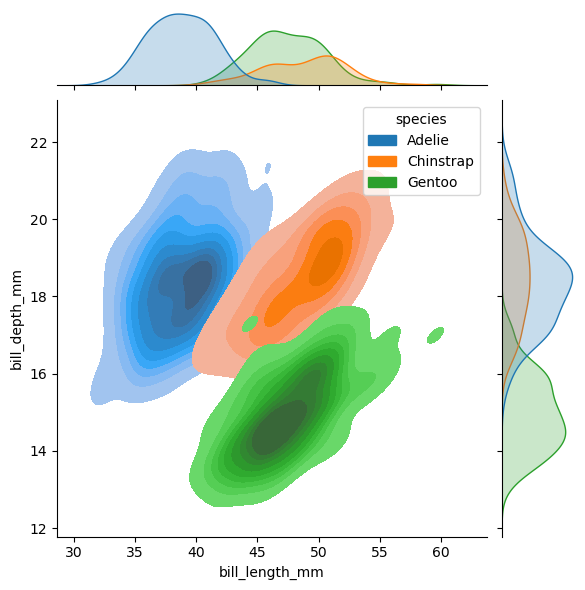

In [8]:
#A plot to illustrate distributions

sns.jointplot(
    data=df,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde", fill=True
)
plt.show()

# Task: 
look into the help of *sns.jointplot* and test a few of the options 

In [ ]:
#A plot with moments in it
sns.boxenplot(x="species", y="body_mass_g", hue="sex", data=df)
plt.show()

# Task: 
look into the help of *sns.jointplot* and test a few of the options

In [ ]:
#The matplotlib version is not as informative
plt.boxplot([df[df['species'] == s]['body_mass_g'].dropna() for s in df['species'].unique()],
            labels=df['species'].unique())
plt.ylabel("Body Mass (g)")
plt.title("Matplotlib Boxplot (no extra quantiles)")
plt.show()

In [ ]:
# Create a violin plot: body mass by species, split by sex, with clear styling
plt.figure(figsize=(8, 5))
sns.violinplot(
    data=df, 
    x="species", 
    y="body_mass_g", 
    hue="sex", 
    split=True,
    inner="quartile",           # Shows the quartiles inside the violin
    palette="muted"
)
plt.title("Body Mass Distribution by Species and Sex")
plt.ylabel("Body Mass (g)")
plt.xlabel("Penguin Species")
plt.legend(title="Sex", loc="upper right")
plt.tight_layout()
plt.show()


# Advanced:

The manual solution to column reading would be to copy paste the column names:

In [ ]:
col_names = """
               N  Epoch  Energy  k  Mono  Seconds  ion1  ion2  ion3  ion4  mud  mud1 
               mostabc  SYNM PR  bun-1  bun-1GS  bun1  bun1GS  bun2  bun2GS  DifSYN
               Difb_1  Difb1  Difb2  c0o0b0  c0o1b0  c0o2b0  c0o3b0  c0o4b0  c0o5b0 
               c0o6b0  c0o7b0  c0o8b0  c0o9b0  c0o10b0  c0o11b0  c0o12b0  c0o13b0 
               c0o14b0  c0o15b0  c0o16b0  c0o17b0  c0o18b0  c0o19b0  c0o20b0  c0o21b0 
               c1o0b0  c1o1b0  c1o2b0  c1o3b0  c1o4b0  c1o5b0  c1o6b0  c1o7b0  c1o8b0 
               c1o9b0  c1o10b0  c1o11b0  c1o12b0  c1o13b0  c1o14b0  c1o15b0  c1o16b0 
               c1o17b0  c1o18b0  c1o19b0  c1o20b0  c1o21b0  c2o0b0  c2o1b0  c2o2b0  c2o3b0 
               c2o4b0  c2o5b0  c2o6b0  c2o7b0  c2o8b0  c2o9b0  c2o10b0  c2o11b0  c2o12b0 
               c2o13b0  c2o14b0  c2o15b0  c2o16b0  c2o17b0  c2o18b0  c2o19b0  c2o20b0 
               c2o21b0  c3o0b0  c3o1b0  c3o2b0  c3o3b0  c3o4b0  c3o5b0  c3o6b0  c3o7b0 
               c3o8b0  c3o9b0  c3o10b0  c3o11b0  c3o12b0  c3o13b0  c3o14b0  c3o15b0 
               c3o16b0  c3o17b0  c3o18b0  c3o19b0  c3o20b0  c3o21b0
            """.split() # split single string into list of string

print(f"print the first 8 of {len(col_names)} entries:\n {col_names[:8]}")

files = os.sep.join(
    [os.getcwd(), "Kemm30", "lectures", "Data", "APS_Copper_SolarCell.dat"]
)

df3 = pd.read_csv(files, skiprows=30, sep="\s+", names=col_names, index_col="Energy")
df3.tail()

There are automatic ways how to do this column extraction:
The first method only reads the columns you want and reduces the work, but requires me to count

In [ ]:
df3a = pd.read_csv(
    files, skiprows=30, sep="\s+", names=["Energy", "PR"], index_col=0, usecols=[2, 14]
)

The second method uses an escape character to extract the column names automatically and allows then the use of the name:

In [ ]:
df3b = pd.read_csv(
    files, skiprows=29, escapechar="L", sep="\s+", index_col=0, usecols=["Energy", "PR"]
)

### Advanced Task: 

Create the a DataFrame with position from -5 cm to 5 cm as the index and in the columns different gaussians bell curves <br>
${\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\operatorname {exp} \left(-{\frac {\left(x-\mu \right)^{2}}{2\sigma ^{2}}}\right)$<br>
with the same central position (mu=0) and different width sigma (0.5,1,2,3,4)
using the simplified plotting from above to show them in the same plot

In the previous exercise you _manually_ extracted data from the internet which is problematic due to several reasons:

1. it's time consuming
2. it's error prone
3. what if the source is updated / corrected?

The following example uses _Pandas_ which is an external module used to handle large data bases; millions of entries is not a problem. As you will see, we simple point it to the Wikipedia page and it will automatically - and almost magically - detect the table and extract the values.

In [ ]:
tables = pd.read_html("https://en.wikipedia.org/wiki/Hydrophobicity_scales")
p = tables[0]  # list of table found. Only one is found on the page.
p.head()  # show the first five rows (the head)

In [ ]:
p.to_excel("hydrophobicity.xlsx")  # save to MS Excel file

In [ ]:
# we "zip" up two columns to form a dictionary. In Pandas, index can be given by their names.
d = dict(zip(p["Amino acid"], p["Interface scale, ΔGwif (kcal/mol)"]))
d

In [ ]:
d["Cys"]

In [ ]:
plt.close("all")
delta_G_values = list(d.values())
delta_G_values = [
    float(i.replace("−", "-")) for i in delta_G_values
]  # weird minus sign on wikipedia!
aminoacid_names = list(d.keys())
plt.bar(aminoacid_names, delta_G_values)  # bar plot expects x and y values as lists
plt.xticks(rotation=90)
plt.xlabel("amino acid")
plt.ylabel("$\Delta G$ (kcal/mol)")
plt.title("source: wikipedia")
plt.show()

### Bonus Exercise

In the above we created two lists `delta_G_values` and `aminoacid_names` but the data is taken directly from the Wikipedia table and unsorted with respect to $\Delta G$. Use the answer to [this question](https://stackoverflow.com/questions/9764298/is-it-possible-to-sort-two-listswhich-reference-each-other-in-the-exact-same-w) to simultaneously sort both lists and re-plot the results.

### Excercise

1. Extract all tables from Wikipedias [list of Nobel laureates in Chemistry](https://en.wikipedia.org/wiki/List_of_Nobel_laureates_in_Chemistry) into a list named `nobel`
1. How many tables did you find?
1. Show and investigate the first table
1. Try the following code:
```python
# Modified after https://stackoverflow.com/questions/40581312/how-to-create-a-frequency-table-in-pandas-python
url     = 'https://en.wikipedia.org/wiki/List_of_Nobel_laureates_in_Chemistry'
nobel   = pd.read_html(url)
df      = pd.value_counts(nobel[0]['Country[B]']).to_frame()
mask    = df['count']>1 # only countries with two or more prizes
df      = df[mask]
explode = df.index.values =='Sweden'
plt.pie(df.values.squeeze(),
        labels=df.index.values,
        autopct='%1.0f%%',
        radius=1., 
        explode=explode )
plt.show()
```
5. have a look at `df`.
6. have a look at `mask`. How does it work?
7. have a look at `explode`. How does it work?
